# Machine Learning Project
## Name: Navy Neang

## Overview

The purpose of this project is to a create machine learning model to accurately predict students' final performances to use for our advising team.  We will look at various attributes that may contribute to students' performances. 

### Business Problem

Based on the available data, we need to be able to identify students who are struggling and will need additional educational support or intervention to improve their grades in the course with the use of machine learning. 

### Framing the Problem

Using the dataset, we are interested in how well our model will perform when it's shown new data in order to accurately predict students' performances. We will be using supervised machine learning for this project since we will be predicting a continous quantity. Supervised learing is when we input our features or attributes along with our respective target. In a supervised learning model, there are labels and targets are already defined in our data whereas the unsupervised learning model processes unlabelled or raw training data. In our supervised learning model, we will be using the batch learning model since there's no continous flow of data throughout the data. The dataset is also not large so the machine has the capablity to handle such computing power. If there were to be continous flow of data daily, then it would be best to use online learning to accomodate for the constant fluctuations of the incoming data used to accurately predict the outcome, such as the stock market. 

### Machine Learning Task

Our task is to create a machine learning model to predict the students who have failed the course so that additional assistance can be provided. This will be a regression task since we are trying to predict the numeric final G3 grade. Unlike the regression task for our machine learning model where it predicts a numeric value, another option would be a classification task will predict discrete class labels. We will focus on the regression option. 

### Metrics

We will be using the Root Mean Square Error (RMSE) as the performance measure for our regression problems. The RMSE mean value will give us an idea of how much error the model makes in its prediction. 


### Other

We will be focusing on the numeric grade values rather than the categorical values hence the regression task.  

## Get the Data


### Standard Import

We will be importing the standard packages used in this project here and all other packages will be imported later on in their respective sections. 

In [1]:
# standard imports
import pandas as pd
import numpy as np


# Do not change this option; This allows the CodeGrade auto grading to function correctly
pd.set_option('display.max_columns', 20)

### Import Data
 

In [2]:
#The student-mat.csv file will be inported in this section and the Dataframe is saved as student.

student = pd.read_csv('student-mat.csv')

### Check the size and type of data

Let's begin by examining fundamental details about the dataset. First, we will review the columns, check the total count of non-null entries, and analyze the data types associated with each column.

In [3]:
# The details of the file are displayed as follows. 

student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       395 non-null    object 
 1   sex          395 non-null    object 
 2   age          383 non-null    float64
 3   address      395 non-null    object 
 4   famsize      395 non-null    object 
 5   Pstatus      395 non-null    object 
 6   Medu         395 non-null    int64  
 7   Fedu         395 non-null    int64  
 8   Mjob         395 non-null    object 
 9   Fjob         395 non-null    object 
 10  reason       395 non-null    object 
 11  guardian     395 non-null    object 
 12  traveltime   395 non-null    int64  
 13  studytime    395 non-null    int64  
 14  failures     395 non-null    int64  
 15  schoolsup    395 non-null    object 
 16  famsup       395 non-null    object 
 17  paid         395 non-null    object 
 18  activities   395 non-null    object 
 19  nursery 

### Feature Description

Below are all the columns and what they represent. 
 
    1. school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
    2. sex - student's sex (binary: "F" - female or "M" - male)
    3. age - student's age (numeric: from 15 to 22)
    4. address - student's home address type (binary: "U" - urban or "R" - rural)
    5. famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
    6. Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
    7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
    8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
    9. Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
    10. Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
    11. reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
    12. guardian - student's guardian (nominal: "mother", "father" or "other")
    13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
    14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
    15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
    16. schoolsup - extra educational support (binary: yes or no)
    17. famsup - family educational support (binary: yes or no)
    18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
    19. activities - extra-curricular activities (binary: yes or no)
    20. nursery - attended nursery school (binary: yes or no)
    21. higher - wants to take higher education (binary: yes or no)
    22. internet - Internet access at home (binary: yes or no)
    23. romantic - with a romantic relationship (binary: yes or no)
    24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent) 25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
    26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
    27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high) 28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) 29. health - current health status (numeric: from 1 - very bad to 5 - very good)
    30. absences_G1 - number of school absences for G1 term (numeric)
    31. absences_G2 - number of school absences for G2 term (numeric)
    32. absences_G3 - number of school absences for G3 term (numeric)
    33. G1 - first term grade (numeric: from 0 to 20)
    34. G2 - second term grade (numeric: from 0 to 20)
    35. G3 - final grade (numeric: from 0 to 20, ← this is the output target)
   



In [4]:
#we are viewing the complete dataset to determine for any missing values 

student

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences_G1,absences_G2,absences_G3,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,1.0,1.0,4.0,5,6,6
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,3,1,1,3,NaN,NaN,NaN,5,5,6
2,GP,F,15.0,U,LE3,T,1,1,at_home,other,...,2,2,3,3,1.0,1.0,8.0,7,8,10
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,2,1,1,5,0.0,0.0,2.0,15,14,15
4,GP,F,NaN,U,GT3,T,3,3,other,other,...,2,1,2,5,0.0,0.0,4.0,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20.0,U,LE3,A,2,2,services,services,...,4,4,5,4,1.0,1.0,9.0,9,9,9
391,MS,M,17.0,U,LE3,T,3,1,services,services,...,5,3,4,2,0.0,0.0,3.0,14,16,16
392,MS,M,21.0,R,GT3,T,1,1,other,other,...,3,3,3,3,0.0,0.0,3.0,10,8,7
393,MS,M,18.0,R,LE3,T,3,2,services,other,...,1,3,4,5,NaN,NaN,NaN,11,12,10


### Label/Target Identification 

The first thing we will do is to define our labels (features) and target from the data set. Since we are trying to predict the grade of the students for the final period, the G3 feature will be defined as the target while the rest of the other features will be the label features. To do so, we will drop the G3 column from the original data set and rename the dropped columns as a Series called G3_target. The rest of the dataset will be named student_features. 

In [5]:
#Dropping the G3 column and naming it as G3_target as the target while the remaining dataset only contains the student features.

G3_target = student['G3']
G3_target

student_features = student.loc[:, student.columns != 'G3']
student_features

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences_G1,absences_G2,absences_G3,G1,G2
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,1.0,1.0,4.0,5,6
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,NaN,NaN,NaN,5,5
2,GP,F,15.0,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,1.0,1.0,8.0,7,8
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0.0,0.0,2.0,15,14
4,GP,F,NaN,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0.0,0.0,4.0,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20.0,U,LE3,A,2,2,services,services,...,5,4,4,5,4,1.0,1.0,9.0,9,9
391,MS,M,17.0,U,LE3,T,3,1,services,services,...,4,5,3,4,2,0.0,0.0,3.0,14,16
392,MS,M,21.0,R,GT3,T,1,1,other,other,...,5,3,3,3,3,0.0,0.0,3.0,10,8
393,MS,M,18.0,R,LE3,T,3,2,services,other,...,4,1,3,4,5,NaN,NaN,NaN,11,12


After droppng the G3 column to partition the target from the features, we see that the resulting dataset only contains 34 columns as opposed to the original 35. 

### Creating the training and testing data

Before we go any further in examing the data, we will first create a training and testing data sets for the machine learning process.

We will be using the  Scikit-learn's train_test_split function to separate the data into the training and test data set.The student_features columns are the labels while the G3_target column is target for this project. Of the total data, 80% of the instances will be designated for the training set while the other 20% will be used as the testing set. The random_state will be set to 42 to ensure reproducibility of our results. The resulting DataFrames are assigned as the following names: X_train, X_test, y_train, and y_test.

In [6]:
#Import Scikit-learn's train_test_split function

from sklearn.model_selection import train_test_split

In [7]:
#Partitioning the data into the training and testing data set

x_data = student_features
y_data = G3_target


X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 42)


In [8]:
#View the training data set

X_train

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences_G1,absences_G2,absences_G3,G1,G2
181,GP,M,16.0,U,GT3,T,3,3,services,other,...,2,3,1,2,3,0.0,0.0,2.0,12,13
194,GP,M,16.0,U,GT3,T,2,3,other,other,...,3,3,1,1,3,0.0,0.0,0.0,13,14
173,GP,F,16.0,U,GT3,T,1,3,at_home,services,...,3,5,1,1,3,0.0,0.0,0.0,8,7
63,GP,F,16.0,U,GT3,T,4,3,teacher,health,...,4,4,2,4,4,0.0,0.0,2.0,10,9
253,GP,M,16.0,R,GT3,T,2,1,other,other,...,3,2,1,3,3,0.0,0.0,0.0,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,GP,M,15.0,U,GT3,T,4,2,other,other,...,3,3,1,1,3,0.0,0.0,0.0,10,10
106,GP,F,15.0,U,GT3,T,2,2,other,other,...,1,2,1,1,3,NaN,NaN,NaN,7,8
270,GP,F,19.0,U,GT3,T,3,3,other,services,...,3,5,3,3,5,2.0,2.0,11.0,9,9
348,GP,F,17.0,U,GT3,T,4,3,health,other,...,4,3,1,3,4,0.0,0.0,0.0,13,15


The training data contains exactly 80% of the total instances within the dataset since the partitioning. This 80% should give us a good idea of the predicted outcome since the model will be trained on the training set. The remaing 20% of the data is the the validation set, which is used to ensure we have a good performing model.  

## Explore the Data

### Feature characteristics

Now we are ready to look at the characteristics of the features that are the potential predictors for the students' performance.

First, we will be diving into the specifics of theses features and examing their descriptive statistics for our numerical data. 

In [9]:
## check descriptive statistics of the numerical features 

X_train.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences_G1,absences_G2,absences_G3,G1,G2
count,305.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,305.000000,305.000000,305.000000,316.000000,316.000000
mean,16.747541,2.734177,2.544304,1.430380,2.047468,0.335443,3.943038,3.218354,3.161392,1.500000,2.344937,3.518987,0.704918,0.704918,4.488525,10.933544,10.651899
std,1.274188,1.080375,1.078476,0.688842,0.836258,0.735588,0.885464,1.020323,1.119480,0.903257,1.296395,1.410714,1.373435,1.373435,5.824238,3.216823,3.755930
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,8.000000,9.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,0.000000,0.000000,4.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,1.000000,1.000000,6.000000,13.000000,13.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,12.000000,12.000000,51.000000,19.000000,19.000000


These descriptive statistics provides us with the insights into the data's central tendencies, spread, distribution, and potential anomalies. These insights will become useful down the process to help us make informed decision in selecting the best model. 

Next, we will examine the  categorical features by looking at their respective value counts percentages to inspect the distribution of values. 

In [10]:
#View training data of only categorical features
X_train_1 = X_train.select_dtypes(include=['object'])
X_train_1.columns


Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

This array only contains the categorical features that are present in the training dataset. 

In [11]:
#View value counts of the internet feature within data set
#Multiple different features can be examined at once or individually to get an idea of the proportions of the features. 

X_train['internet'].value_counts(normalize=True)

internet
yes    0.838608
no     0.161392
Name: proportion, dtype: float64

### Visualizing the Data

Next we will be visualizing our training set data to determine for any noticeable pattern. We will be utilizing the matplotlib and seaborn to create the visualizing looking at several features. 

The first plot we will be looking at are histograms of all of the features. This will give us an idea of the distribution of those features as well as a quick glance as to whether there are any outliers present.

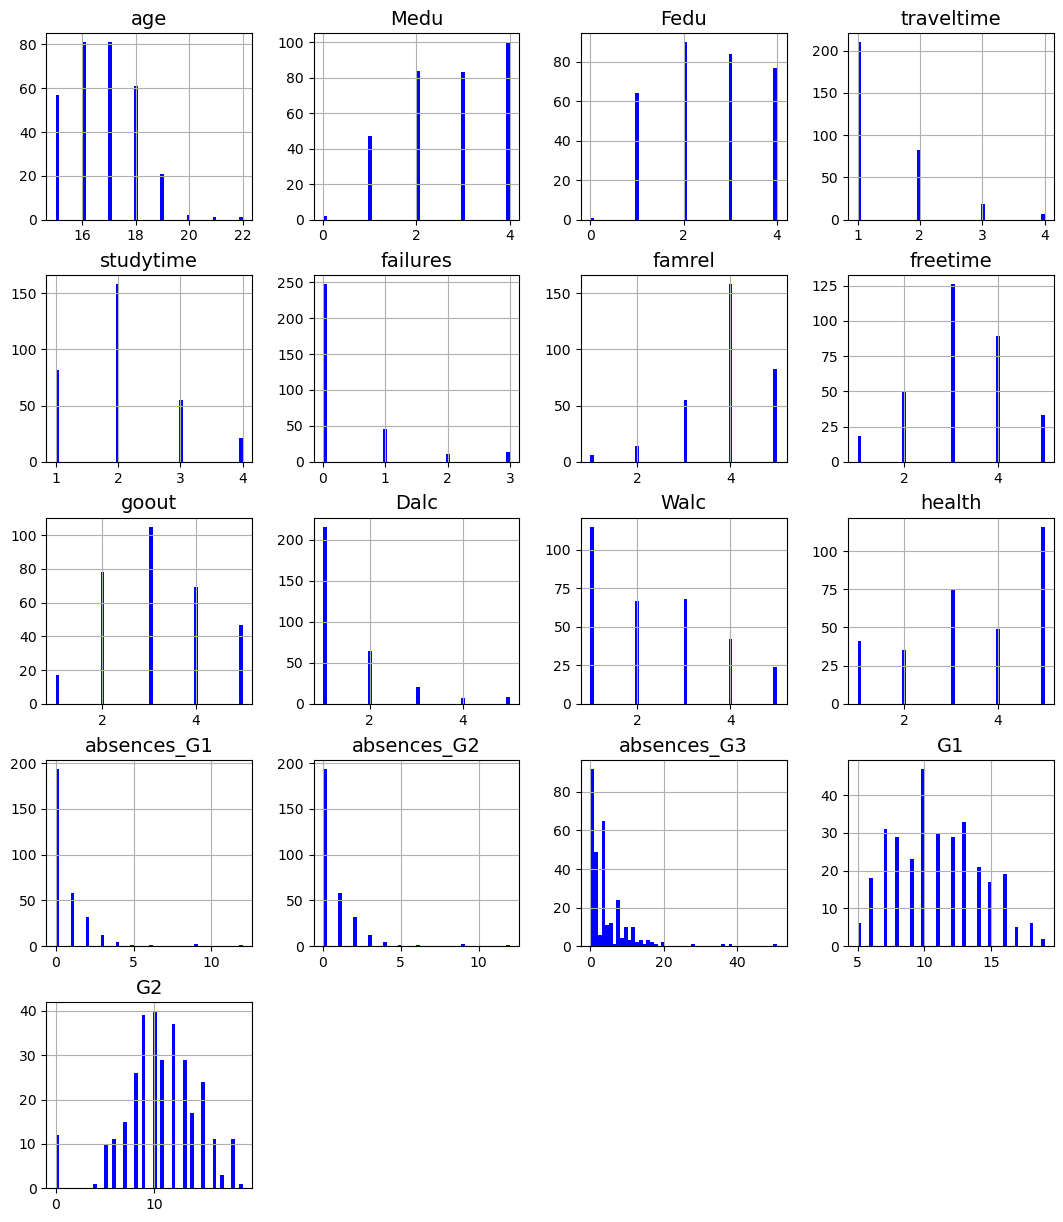

In [12]:
#Import needed for visualization
import matplotlib as mpl
import matplotlib.pyplot as plt

#Define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# plots histograms of numerical data
X_train.hist(bins=50, figsize=(13, 15), color='blue')
plt.show()


From the histograms, the following can be observed: 

    1. The features are distributed differently. Many of them are right skewed. This tells us that many of the
    instances are in the lower range while there are few instances in the higher range resulting in a lower 
    median value than the mean. 

    2. There are some outliers present in the data. 

    3. These features have very different scales. This will be dealt with later on. 
    

Next we will be looking at a box-whisker plot for the absences by age in the 3rd period between males and females. While we got a glimpse of the presence of outliers from the histogram plot, this box-whisker plot will give us more details into the outliers within the group.  

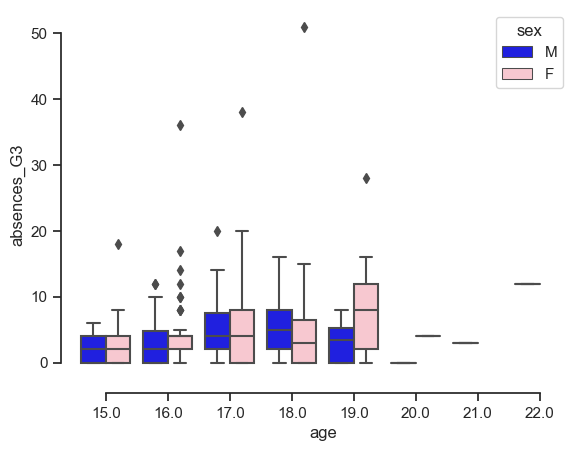

In [13]:
#import need for box-whisker plot
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show absences in the 3rd period by age
sns.boxplot(x="age", y="absences_G3",
            hue='sex', palette=["blue", "pink"],
            data=X_train)
                 
sns.despine(offset=10, trim=True)

This box-whisker plot of the absences by age in the 3rd period of males and females highlights the outliers present when looking at this relationship. There are 12 outliers present and 6 out of those 12 occurs within the female demographics at 16 years old. 


The third plot we will be looking at is a Trivariate histogram with two categorical variables. We will be looking at the studytime and of students who received additional educational support from the school and their family. 

/Users/snowmai/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


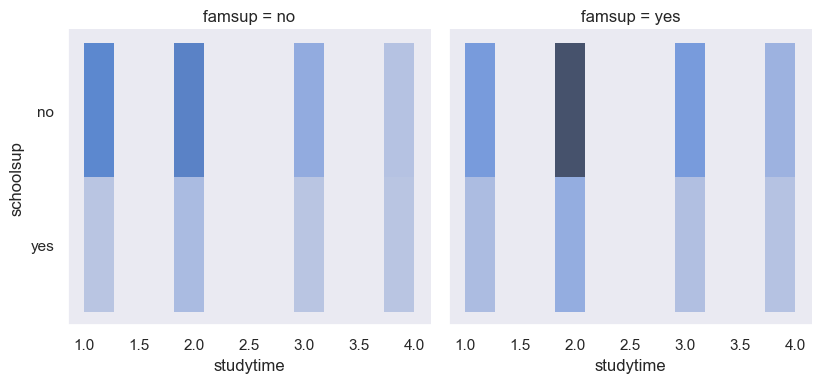

In [14]:
#selecting style of plot
sns.set_theme(style="dark")

#plotting the two categorical features and how that relates to the study time 
sns.displot(
    data=X_train, x="studytime", y="schoolsup", col="famsup",
    log_scale=(False), col_wrap=4, height=4, aspect=1)

From this Trivariate histogram with two categorical variables, we can see that there is not much of a difference in the study time for students who did have educational support from the school regardless if they received support from their family. However, when there was no support from the school we see a significant difference in the study time for both groups who did received support from their family and for those who did not. There seems to be a high number of students who studied for about 2-5 hours with the support of their family. 



The last visualization we will look at is a multiple regression plot. This will give us an idea of whether or not there is a correlation between the features examined. For this plot, we will be looking at the G1 and G2 features for students from the two different schools. 

/Users/snowmai/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


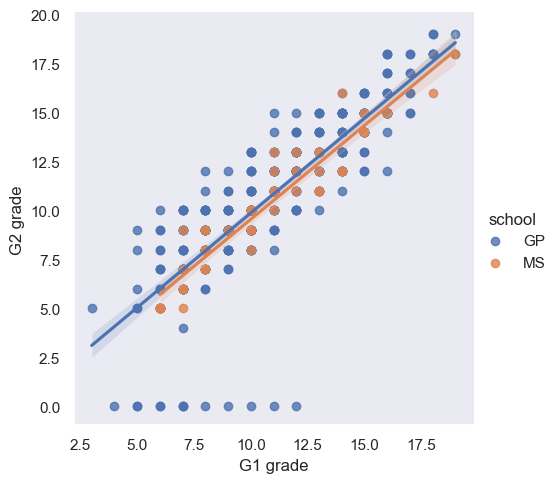

In [15]:
# Ploting G1 grades as a function of G2 grades for the respective schools
g = sns.lmplot(
    data=student,
    x="G1", y="G2", hue="school",
    height=5)

# Use more informative axis labels than are provided by default
g.set_axis_labels("G1 grade", "G2 grade")

This plot shows a strong correlation between the grades from the first period and the grades from the second period for students from Gabriel Pereira and Mousinho da Silveira. There are multiple outliers from the Gabriel Pereira school. It is not surprising there is a strong correlation of the G1 feature to the G2 feature since the grades from the first period likely correlates the students' grade in the second period. This can also be said for the G3 feature, which is what we are trying to predict for this project.  

### Correlation 

In this section, we will be looking at the correlation coefficient among the features to help determine which features should remain in our final data set to train our model. 

We will only be looking at the numeric features in this section. 

In [16]:
# selecting the features to examine in the correlation
col_features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
                   'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences_G1',
                   'absences_G2', 'absences_G3', 'G1', 'G2']

# create new combined DataFrame 
combined_df = pd.concat([X_train[col_features], y_train], axis=1)

# check correlations
corr_matrix = combined_df.corr()

# check how much each attribute correlates with the G3 value
# 1 is a strong positive correlation, -1 is a strong negative correlation, and 0 is no linear correlation
corr_matrix['G3'].sort_values(ascending=False)

G3             1.000000
G2             0.907924
G1             0.791559
Medu           0.215968
studytime      0.138200
Fedu           0.135265
absences_G3    0.092245
famrel         0.069409
absences_G1    0.036652
absences_G2    0.036652
freetime      -0.015244
Walc          -0.057363
Dalc          -0.064698
health        -0.068857
goout         -0.106024
traveltime    -0.106752
age           -0.134519
failures      -0.373769
Name: G3, dtype: float64

From this correlation relationships, we see that G2 had the strongest positive correlation to G3 while failures had the strongest negative correlation. While correlation does not equate to causation, from this we get an idea of the most probable predictors for students' performance. There are more in depth analyses that are needed to be done in order to detemine which predictors are the strongest one for our target. However, for the purposes of this project we will only be using these correlation coefficients to help us make an informed decision on which predictors we will use to train our model. We will only keep the features that have a positive correlation to the target. 

## Prepare the Data

Before we make any transformation to our data to train the machine learning model, we need to prepare the data. Data preparation is a significant step to ensure the best outcome to address our business problem. We begin by removing any features that are not relevant to our model. We will then create a custom transformation to address some parameters for the machine learning model. We'll also set up pipelines to automate the data preparation process and introduce a column transformer to apply transformations to numeric and categorical columns in our dataset.

### Feature Selection

Based on the correlation coefficients, we only want to include the numerical features that have a positive correlation to the G3 feature target. The new dataset will only contain numerical features with a positive correlation to the target as well as the categorical features.  

In [17]:
#new dataset 
student_new = student[['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'Medu', 'Fedu',  
       'studytime', 'famrel', 'absences_G1', 'absences_G2', 'absences_G3', 'G1', 'G2']]
student_new

student_new_1 = student_new.select_dtypes(include=['float', 'int'])
student_new_1

,Medu,Fedu,studytime,famrel,absences_G1,absences_G2,absences_G3,G1,G2
0,4,4,2,4,1.0,1.0,4.0,5,6
1,1,1,2,5,NaN,NaN,NaN,5,5
2,1,1,2,4,1.0,1.0,8.0,7,8
3,4,2,3,3,0.0,0.0,2.0,15,14
4,3,3,2,4,0.0,0.0,4.0,6,10
...,...,...,...,...,...,...,...,...,...
390,2,2,2,5,1.0,1.0,9.0,9,9
391,3,1,1,2,0.0,0.0,3.0,14,16
392,1,1,1,5,0.0,0.0,3.0,10,8
393,3,2,1,4,NaN,NaN,NaN,11,12


### Custom Transformer

In this section we will be creating our custom transformer. It is important to note that only the numerical features will be ultilize for this section for our data transformation. These parameters are: 

     ● has a parameter that when equal to True, drops the G1 and G2 columns, and when False, leaves the 
        columns in the data
     ● creates a new column in the data that sums the absences_G1, absences_G2, and absences_G3 data and 
        then drops those three columns.



In [18]:
#import needed for custom transformer
from sklearn.base import BaseEstimator, TransformerMixin

#column indexes
absences_G1, absences_G2, absences_G3 = 4, 5, 6
G1, G2 = 7, 8

#custion transformer function
class FinalProject_Transformer(BaseEstimator, TransformerMixin):
    def __init__(self, delete_G1_G2= True):
        self.delete_G1_G2 = delete_G1_G2
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = np.array(X) #making all values into numpy array
        absences_sum = X[:,4] + X[:, 5] + X[:, 6] #new column that is the sum of all the absences 
        X = np.c_[X, absences_sum]
        if self.delete_G1_G2:
            X_transformed = np.delete(X, [4, 5, 6, 7, 8], axis=1) #delete G1 and G2 when True 
            return X_transformed
               
        else:
            return np.delete(X, [4, 5, 6], axis=1)

    

### Pipelines

We will be creating multiple pipelines to automate our data for our machine learning model. There are many benefits to ultilzing pipelines, and they include: 

1. Increase the iteration cycles
2. Scale our model
3. Improve the organization and performance of the model
4. Making the machine learning processes more manageable and easier
5. Streamline the process of taking raw data, training ML models, evaluating performance, and integrating predictions into business applications

There will be two different pipelines created to address the numerical features and categorical features. 

#### Num_Pipeline

First, we will be creating a numerical pipeline to address only the numeric data. We will be using the Scikit-Learn's make_pipeline function to create the num_pipeline. Within this pipeline, there will be several functions that will be included to prepare our data. These include: 

    ● make_pipeline
    ● SimpleImputer - used to address missing values 
    ● Custom Transformer - the one we created from above 
    ● Standard Scaler - scaling the numeric data 



Within the makepipeline that addresses the numeric data, we will incorporate the SimpleImputer using the mean strategy to address the missing values. While some dataset may not contain any missing values, we still would want to add the SimpleImputer to address the missing values since we won't know if the new incoming data contains missing data or not. By including this function in the pipeline, we can avoid any issues with missing values. 

We want to include the Custom Transformer function we created from above since we want to transform our data to include the parameters mentioned. This will transform all the data from all steps, not just a specific one such as only the training data. 

And lastly, we will include the Standard Scaler to scale our data. If we do not scale our data, then our model will not accurate. We've seen from the histograms that the features have different scales, so to make things uniform the Standard Scaler function will address such issue. 

After taking viewing the dataset, it was observed that some of the features contain missing values. We want to address these before moving on so as not to skrew our model. 

We will check for which features contain missing values and then handle those by filling them with the mean of the respective features. 

In [19]:
# creates a Series of True/False values if there is a null value in a column
null_rows_idx = X_train.isnull().any(axis=1)

# selecting only the rows with null values
X_train.loc[null_rows_idx].head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences_G1,absences_G2,absences_G3,G1,G2
382,MS,M,17.0,U,GT3,T,2,3,other,services,...,4,3,1,1,3,NaN,NaN,NaN,11,11
59,GP,F,NaN,U,GT3,T,4,2,services,other,...,2,3,1,1,5,0.0,0.0,2.0,15,16
6,GP,M,16.0,U,LE3,T,2,2,other,other,...,4,4,1,1,3,NaN,NaN,NaN,12,12
163,GP,M,17.0,U,GT3,T,1,3,at_home,services,...,3,3,1,4,2,NaN,NaN,NaN,10,10
123,GP,M,NaN,U,GT3,T,4,4,health,other,...,4,4,1,4,5,3.0,3.0,12.0,14,11


These are the features that contain missing values. The data only displayed the first five rows of features. There are a total of 22 rows with missing values for a specific feature. The features that contain missing values are: age, absences_G1, absences_G2, and absences_G3. 

Now, we will create our numeric pipeline to address for missing values and the different scaling each features has with the additon of the custom transformer we created previously to transform our training data. 

In [20]:
#imports for num_pipeline
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

#make num_pipeline for when True
num_pipeline_T = make_pipeline(
    SimpleImputer(strategy = 'mean'),
    FinalProject_Transformer(delete_G1_G2= True),
    StandardScaler())

#make num_pipeline for when False 
num_pipeline_F = make_pipeline(
    SimpleImputer(strategy = 'mean'),
    FinalProject_Transformer(delete_G1_G2= False),
    StandardScaler())

Since our data contain both numerical and categorical features, we need to separate the data to only contain the numerical features. The mean strategy in the SimpleImputer Estimator does not apply to features that are categorical. 

#### Cat_pipeline

We will now create a pipeline for the categorical data. Similar to the numeric data, we will use the Scikit-Learn's make_pipeline function to create the cat_pipeline to address the text and categorical data. Within this pipeline we will include: 

    ● make_pipeline
    ● SimpleImputer - to address for missing texts/categorical attributes
    ● OneHotEncoder - encode nominal or categorical data
    ● OrdinalEncoder - encode features that are either binary or that are ordinal in nature

The make_pipeline function will be used to make the cat_pipeline. Included in this pipeline is the SimpleImputer function to help address for any missing data in the categorical data using the most_frequent strategy to replace any missing values with the most frequent value for each column. 

The OneHotEncoder is a function that is also included in the make_pipeline function. Since most machine learning algorithms prefer to work with numbers, we will now convert these categories from text to numbers.The purpose of OneHotEncoder function is to encode any nominal or categorical data into numbers so our model can be processed easier and more efficiently. 

The last function included in the make_pipeline is the OrdinalEncoder function. Similarly to the OneHotEncoder function, this function is used to encode features that are either binary or that are ordinal in nature. 

In [21]:
#imports for cat_pipeline 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

#make cat_pipeline
cat_pipeline =  make_pipeline(
    SimpleImputer(strategy = 'most_frequent'), 
    OneHotEncoder(drop = 'first', sparse_output = False),
    OrdinalEncoder())

### Column Transformer

The Column Transformer will be used to pass the numeric data to the num_pipeline and the categorical features to the cat_pipeline. 

We will first be creating a list for the numerical and categorical list respectively. The list of the numerical feature column names will be named num_attributes while the categorical feature column names will be named cat_attributes. 

Once the attribute lists have been created, we will pass the numeric and categorical data through their respective pipelines to transform the training data. The resulting prepared data will then be used for our models. 

In [22]:
#import needed for column Transformer
from sklearn.compose import ColumnTransformer

#creating numerical and categorical lists
num_attributes = ['Medu', 'Fedu','studytime', 'famrel', 'absences_G1', 'absences_G2', 'absences_G3', 'G1', 'G2']
cat_attributes = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob','reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

#passing the numerical/categorical data through respective pipelines when Custom Transformer is True
preprocessing_T = ColumnTransformer([
    ('num', num_pipeline_T, num_attributes), 
    ('cat', cat_pipeline, cat_attributes)
    ])

#transforming the training data 
X_train_prepared_T = preprocessing_T.fit_transform(X_train)
X_train_prepared_T

array([[ 0.24643712,  0.42320737, -0.05685286, ...,  1.        ,
         1.        ,  1.        ],
       [-0.68063585,  0.42320737, -1.25455313, ...,  1.        ,
         1.        ,  0.        ],
       [-1.60770883,  0.42320737, -0.05685286, ...,  1.        ,
         1.        ,  1.        ],
       ...,
       [ 0.24643712,  0.42320737, -0.05685286, ...,  1.        ,
         1.        ,  0.        ],
       [ 1.17351009,  0.42320737,  1.14084741, ...,  1.        ,
         1.        ,  1.        ],
       [ 1.17351009,  1.35191243, -1.25455313, ...,  1.        ,
         1.        ,  0.        ]])

In [23]:
#passing the numerical/categorical data through respective pipelines when Custom Transformer is False
preprocessing_F = ColumnTransformer([
    ('num', num_pipeline_F, num_attributes), 
    ('cat', cat_pipeline, cat_attributes)])

#transforming the training data 
X_train_prepared_F = preprocessing_F.fit_transform(X_train)
X_train_prepared_F

array([[ 0.24643712,  0.42320737, -0.05685286, ...,  1.        ,
         1.        ,  1.        ],
       [-0.68063585,  0.42320737, -1.25455313, ...,  1.        ,
         1.        ,  0.        ],
       [-1.60770883,  0.42320737, -0.05685286, ...,  1.        ,
         1.        ,  1.        ],
       ...,
       [ 0.24643712,  0.42320737, -0.05685286, ...,  1.        ,
         1.        ,  0.        ],
       [ 1.17351009,  0.42320737,  1.14084741, ...,  1.        ,
         1.        ,  1.        ],
       [ 1.17351009,  1.35191243, -1.25455313, ...,  1.        ,
         1.        ,  0.        ]])

## Shortlist Promising Models 

After preparing our data and making all the necessary transformations, we will be selecting several models to fit and train our data. We will also be comparing the models with the dropped G1 and G2 columns vs with those two columns remaining. The reason why we want to compare the models with the G1 and G2 column drop vs with them remaining is to determine if the accurancy without those features will significantly affect the model. We were told that the G1 and the G2 features have a strong correlation with the target, G3, since the grades from the first and second period will have an impact on the final grade period. 

The first model we will take a look at is linear regression. We will perform this model on the training data with the dropped G1 and G2 features as well as one with them remaining. After fitting our model, we will compare them by using cross validation. 

### Linear Regression

In [24]:
#import needed for linear regression 
from sklearn.linear_model import LinearRegression

#linear regression model when True (dropped G1 and G2)
lin_reg_T = LinearRegression()
lin_reg_T.fit(X_train_prepared_T, y_train)

#import needed for cross validation score 
from sklearn.model_selection import cross_val_score


# perform a 10-fold cross validation using the `lin_reg_T` model

from sklearn.model_selection import cross_val_score

lin_reg_rmses_T = -cross_val_score(lin_reg_T, X_train_prepared_T, y_train,
                              scoring="neg_root_mean_squared_error", cv=10)

lin_reg_rmses_T

array([4.71858367, 4.3809284 , 3.70984559, 4.86182924, 4.93482137,
       4.84622525, 5.1037406 , 4.86309067, 4.49050129, 4.43000159])

In [25]:
#We will be looking at the mean target to compare this when it is true to when it is false 
lin_reg_rmses_T_stats = pd.Series(lin_reg_rmses_T).describe()
lin_reg_rmses_T_stats

count    10.000000
mean      4.633957
std       0.401116
min       3.709846
25%       4.445127
50%       4.782404
75%       4.862775
max       5.103741
dtype: float64

In [26]:
#linear regression model when False (G1 and G2 remaining)
lin_reg_F = LinearRegression()
lin_reg_F.fit(X_train_prepared_F, y_train)

# perform a 10-fold cross validation using the `lin_reg_F` model
from sklearn.model_selection import cross_val_score
lin_reg_rmses_F = -cross_val_score(lin_reg_F, X_train_prepared_F, y_train,
                              scoring="neg_root_mean_squared_error", cv=10)

lin_reg_rmses_F

array([2.13876862, 2.038048  , 1.08721981, 1.77784101, 1.77475183,
       1.71539547, 1.80563504, 2.47654585, 1.73246929, 1.94455404])

In [27]:
#We will be looking at the mean target to compare this when it is true to when it is false 
lin_reg_rmses_F_stats = pd.Series(lin_reg_rmses_F).describe()
lin_reg_rmses_F_stats

count    10.000000
mean      1.849123
std       0.356969
min       1.087220
25%       1.743040
50%       1.791738
75%       2.014675
max       2.476546
dtype: float64

From the cross validation score, we see that the model that employed the G1 and G2 features yielded a better model compared to the one with the drop columns. The mean rmse score for the model that dropped the column is 4.633957 while the mean rmse score for the model that contained the G1 and G2 features is mean 1.849123. As predicted, the model that contains the G1 and G2 features did perform better than the one that did not. 

### Decision Tree Regression

We will now fit our data with a more complex model to determine whether or not our data will fit better than the linear regression model. 

In [28]:
#import needed for decision tree regression
from sklearn.tree import DecisionTreeRegressor

#decision tree model when True (dropped G1 and G2)
#the random state is set to 42 to ensure reproducibility
tree_reg_T = DecisionTreeRegressor(random_state=42)
tree_reg_T.fit(X_train_prepared_T, y_train)

# perform a 10-fold cross validation using the `tree_reg_T` model
tree_reg_rmses_T = -cross_val_score(tree_reg_T, X_train_prepared_T, y_train,
                              scoring="neg_root_mean_squared_error", cv=10)

tree_reg_rmses_T

array([6.09815546, 4.87339717, 4.77297077, 5.98174306, 6.29980158,
       5.7662813 , 5.83648149, 5.56486675, 4.36259763, 6.58688825])

In [29]:
#View rmse statistics for decision treee model when it is true
tree_reg_rmses_T_stats = pd.Series(tree_reg_rmses_T).describe()
tree_reg_rmses_T_stats

count    10.000000
mean      5.614318
std       0.721373
min       4.362598
25%       5.046265
50%       5.801381
75%       6.069052
max       6.586888
dtype: float64

In [30]:
#decision tree model when False (retaining G1 and G2)
tree_reg_F = DecisionTreeRegressor(random_state=42)
tree_reg_F.fit(X_train_prepared_F, y_train)

# perform a 10-fold cross validation using the `tree_reg_F` model
tree_reg_rmses_F = -cross_val_score(tree_reg_F, X_train_prepared_F, y_train,
                              scoring="neg_root_mean_squared_error", cv=10)

tree_reg_rmses_F

array([2.04633819, 2.35849528, 2.06911817, 1.46841752, 1.31101106,
       1.41421356, 1.16397539, 2.17759856, 2.22159489, 2.10988457])

In [31]:
#View rmse statistics for decision treee model when it is false
tree_reg_rmses_F_stats = pd.Series(tree_reg_rmses_F).describe()
tree_reg_rmses_F_stats

count    10.000000
mean      1.834065
std       0.441234
min       1.163975
25%       1.427765
50%       2.057728
75%       2.160670
max       2.358495
dtype: float64

Similar to linear regression, the model performs better with the additional fo the G1 and G2 columns. When the decision tree used the data of then the parameters were true (dropped G1 and G2) the rmse score was 5.614318 and when it was false (retaining G1 and G2), the rmse score was 1.834065. From these values, we can see that the decision tree model performed worsed than the linear regression model. 

### Random Forest Regression 

The last model we will be training our model on is the random forest regression. We will be first be looking at the rmse mean value when it is true and compare the model to when it is false. 

In [32]:
#import for Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

#decision randoem forest model when True (dropped G1 and G2)
forest_reg_T = RandomForestRegressor(random_state=42)

#perform a 10-fold cross validation using the `forest_reg_T` model
forest_rmses_T = -cross_val_score(forest_reg_T, X_train_prepared_T, y_train,
                                scoring="neg_root_mean_squared_error", cv=10)
forest_rmses_T 

array([4.23921978, 4.34322281, 3.17517421, 4.28218986, 4.2084929 ,
       4.0413484 , 4.98469464, 4.68843154, 4.13869701, 4.35567594])

In [33]:
#View rmse statistics for random forest model when it is true
forest_rmses_T_stats = pd.Series(forest_rmses_T).describe()
forest_rmses_T_stats

count    10.000000
mean      4.245715
std       0.467347
min       3.175174
25%       4.156146
50%       4.260705
75%       4.352563
max       4.984695
dtype: float64

In [34]:
#decision tree model when True (dropped G1 and G2)
forest_reg_F = RandomForestRegressor(random_state=42)

# perform a 10-fold cross validation using the `forest_reg_F` model
forest_rmses_F = -cross_val_score(forest_reg_F, X_train_prepared_F, y_train,
                                scoring="neg_root_mean_squared_error", cv=10)
forest_rmses_F

array([1.43096449, 1.61702369, 1.16667798, 0.98419224, 1.18828658,
       1.23106661, 1.18542085, 2.10652749, 1.63491442, 1.25551043])

In [35]:
#View rmse statistics for random forest model when it is false
forest_rmses_F_stats = pd.Series(forest_rmses_F).describe()
forest_rmses_F_stats

count    10.000000
mean      1.380058
std       0.327629
min       0.984192
25%       1.186137
50%       1.243289
75%       1.570509
max       2.106527
dtype: float64

Again, like the linear regression and decison tree models, the random forest model also suggests that the the presence of the G1 and G2 features, the model performed better then when they are absent. When we dropped the two features, the rmse score was 4.245715. And when we kept the two features present in our dataset, the rmse was 1.380058. This model performed better than the two earlier models when comparing rmse scores. 

### Model Comparisons

In this section we will be comparing all three of our models to determine which model fits best for our data. Based on the rmse value of each model, we will select the model with the lowest mean rmse value. The lower the rmse value, the better the model and its prediction.  

In [36]:
#creating table to display rmse values for easy comparison

#creating list for table
comparison = {'lin_reg_rmses_T': ['4.633957'],
              'lin_reg_rmses_F': ['1.849123'],
              'tree_reg_rmses_T': ['5.614318'],
              'tree_reg_rmses_F': ['1.834065'],
              'forest_rmses_T': ['4.245715'],
              'forest_rmses_F': ['1.380058']
             }

#creating dataframe
comparison_table = pd.DataFrame(data=comparison)

#view rmse values of all three models presented in table 
comparison_table


,lin_reg_rmses_T,lin_reg_rmses_F,tree_reg_rmses_T,tree_reg_rmses_F,forest_rmses_T,forest_rmses_F
0,4.633957,1.849123,5.614318,1.834065,4.245715,1.380058


From this comparison table, we see that all the models performed relatively similar to each other only with slight differences in the mean rmse values. All the three models rmse values for when it is true (dropped G1 and G2) have very similar mean rmse values. The same goes for when the models were set to false. 

As predicted earlier, when the model was set to false (retaining G1 and G2 features) the model performed better than when it was set to true. These values for all three models confirms that the G1 and G2 features do significantly correlate to students' final grade. 

Of the three models used, the random forest regressor model was the one that performed the best. It had the lowest rmse value for both when it was set to true and false. The rmse value for when it was true and when it was false was not zero, which indicate that it is not likely that this model is overfitted. 

## Fine-Tune the System

The comparison of our models showed that the random forest regressor is the best model to use out of the three model tested. 

We decided to select the random forest model with the dropped G1 and G2 columns just so that we can independently predict the final grades without the big impact from the grades of the earlier periods.

We will use this model to fine-tune our system. After fine-tuning our model, we will transform our testing data to make the final predictions and access its performance. 

### Grid Search

We will perform a  grid search using GridSearchCV() on the random  forest model when it was set to false. We want the model to predict the students performance without the G1 and G2 features. The purpose of performing the grid search is to help us determine which optimal hyperparameters to use. The all possible combinations of the  hyperparameters will then be evaluated by cross-validation. 

The hyperparameters we will be using to fine-tune our system are n_estimators and  max_features. 

    ● Number of Trees (n_estimators) - the higher the number of trees, the better the performance of the model. However, this requires a lot of computing power. 
    ● Feature Selection Strategy (max_features) - this hyperparameter helps select which features to retain in the model for the best performance. This is important for reducing tree correlation. 
 

In [37]:
#import needed for Grid Search
from sklearn.model_selection import GridSearchCV

# setup the hyperparameter values to search
param_grid = {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
              'max_features': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26]} # 10 x 13 combinations

# instantiate GridSearchCV() with verbose set to 1 and perform 10-fold cross validation
grid_search_cv_forest = GridSearchCV(forest_reg_T,
                              param_grid, verbose=1, cv=10)

# fits the grid search model and printes the best parameters
grid_search_cv_forest.fit(X_train_prepared_T, y_train)
print("The best parameters are: ", grid_search_cv_forest.best_params_)

# saves the best model using the hyperparameters from the grid search
forest_model = grid_search_cv_forest.best_estimator_

Fitting 10 folds for each of 130 candidates, totalling 1300 fits
The best parameters are:  {'max_features': 8, 'n_estimators': 60}


From the grid search we see that the hyperparameter that would enhance our model's performance would be to use 8 features with 60 trees. 

### Final Model Selection and Evaluation 

Finally, we are able to use our selected model on our validation data. The final model that will be utilize is the forest_model, which contains only the best hyperparameter combinations. It is critical that any transformations that were made to the training data will be made to our testing data as well. We will be using our preprocessing data that was created earlier in the ColumnTransformer to transform the testing data. Then we will make the final predictions to the prepared testing data. 

In [38]:
#import needed for final rmse
from sklearn.metrics import mean_squared_error

#making transformation to testing data by using previously created preprocessing data
X_test_prepared = preprocessing_T.transform(X_test)

#predicting students' performances
final_predictions = forest_model.predict(X_test_prepared)

#calculatin the rmse for the final model 
final_rmse = mean_squared_error(y_test, final_predictions,
                               squared = False)

#round rmse sccore
final_rmse = final_rmse.round(2)
final_rmse

#final_predictions

4.4

The final rmse (4.4) is slightly higher than the original random forest rmse value (4.26). Since it is only slightly higher, making any changes to the hyperparameters will likely not make much improvement.  

## Conclusion

The goal of this project was to build a machine learning model that will be able to accurately predict the final grades of student to determine whether or not educational support should be provided to ensure improvements in their grades for the course. Our machine learning model that was built does not show a promising performance in accurately predicing students' final grade with a final rmse value of 4.4. Based on the range of our data set of 0-20, the normalized rmse of our model would be 0.22. This means that the model is not able to accurately predict students' final grade. As noted earlier, the model of when we retained the G1 and G2 features performed way better than the selected model. Perhaps we should use that model that does include the G1 and Ge features to obtain better predictions to determine whether or not the school should provide educational support. 

One of the reasons why our model normalized rmse value is so high might be due to the outliers present in the data set. RMSE values are sensitive to outliers, overfitting, and scale. As we have seen in our visualization sections, there were features that did have outliers as well and scaling issues, these could have been a potential reason why are the rmse vaue was high. 

There are several measures we can take to try to find a better model with a lower rmse value. First, we need to conduct a better analysis of which features to use for our model. This wil ensure that only the ones that are significant will be used while the others will not impact the analysis due to outliers and such. We can also explore more possible regression models to fit our data better, aside from the three we examined. Another option to reduce the high rmse value might be to further fine-tune the hyperparameters to ensure that only the best combinations will be used for the final model. 

Overall, our model is not a good option to use but it can still provide us with an idea of the prediction of students' final grade. The director will have a general sense of potential students who might need the educational support to ensure he/she will improve his/her grades for the course. 